In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn


In [2]:
!pip install kaggle


In [3]:
from google.colab import files
files.upload()  # This will prompt you to upload kaggle.json (API key)


Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"dhanashreegiriya","key":"0ccb7f3fedada0cee62888e68de0be1f"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [5]:
!kaggle datasets download -d mlg-ulb/creditcardfraud


Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 76% 50.0M/66.0M [00:00<00:00, 265MB/s]
100% 66.0M/66.0M [00:00<00:00, 253MB/s]


In [6]:
!unzip creditcardfraud.zip


Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


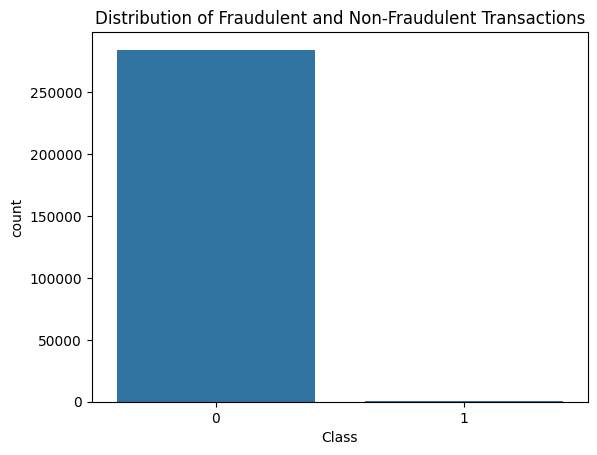

Class
0    284315
1       492
Name: count, dtype: int64


In [8]:
sns.countplot(x='Class', data=df)
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.show()
print(df['Class'].value_counts())


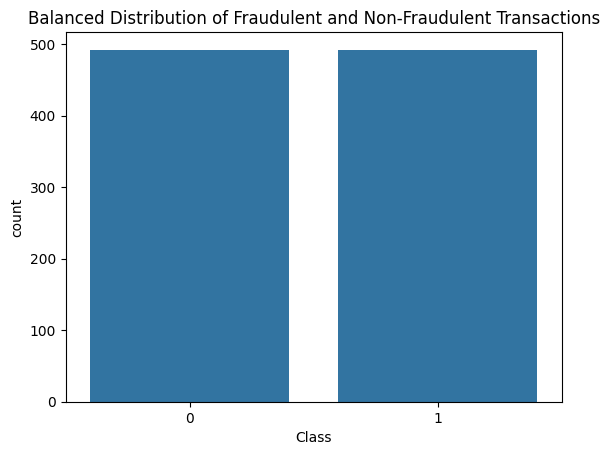

In [9]:
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]
non_fraud_downsampled = non_fraud.sample(len(fraud))
df_balanced = pd.concat([fraud, non_fraud_downsampled])
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)
sns.countplot(x='Class', data=df_balanced)
plt.title('Balanced Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.show()


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = df_balanced.drop(['Class'], axis=1)
y = df_balanced['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [11]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn.fit(X_train, y_train)


KNeighborsClassifier()

Accuracy: 0.9324324324324325

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       151
           1       0.98      0.88      0.93       145

    accuracy                           0.93       296
   macro avg       0.94      0.93      0.93       296
weighted avg       0.94      0.93      0.93       296



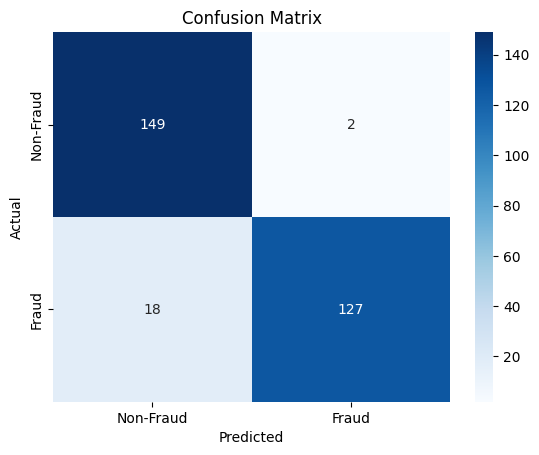

In [12]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Predict on test data
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report (Precision, Recall, F1-Score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [13]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 15)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
print(f"Best n_neighbors value: {grid.best_params_}")


Best n_neighbors value: {'n_neighbors': 5}


In [14]:
import joblib
joblib.dump(knn, 'knn_credit_risk_model.pkl')




['knn_credit_risk_model.pkl']